In [84]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

In [159]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # 불용어처리

#  빈도수 높은 키워드 처리
stop_words.extend(['from', 'subject', 're', 'edu', 'use',' court', 'home',' council', 'hunter', 'help', 'time', 'injure', 'national', 'build', 'end', 'bid', 'cup', 'un', 'come', 'security', 'volunteer', 'ship', 'crew', 'crowd', 'join', 'helicopter', 'across', 'museum', 'Italy', 'grind', 'asian', 'sa', 'miss', 'one', 'die', 'use', 'three', 'Darwin', 'vic', 'number', 'may', 'start', 'law', 'way', 'communities', 'order', 'check', 'major', 'india', 'focus', 'form', 'journalist', 'milk', 'nz', 'rank', 'cook', 'egypt', 'New', 'year', 'force', 'fail', 'dead', 'was', 'farmer', 'fruit', 'philippines', 'injury', 'nick'])
stop_words.extend(['fire', 'new', 'hobart', 'rural', 'world', 'boat', 'turn', 'flight', 'around', 'well', 'Find', 'two', 'adelaide', 'murder', 'first', 'make', 'body', 'probe', 'outback', 'tourism', 'baby', 'David', 'street', 'mass', 'hotel', 'Police', 'say', 'open', 'dog', 'go', 'welcome', 'president', 'announce', 'level', 'allow', 'highest','queensland', 'kill', 'crash', 'road', 'record', 'nt', 'hit', 'plane', 'toll', 'suspend', 'peninsula', 'afghan', 'recovery','man', 'perth', 'flood', 'people', 'prison', 'still', 'supply', 'siege', 'spark', 'summer', 'Michael', 'ops', 'large', 'flash', 'view', 'attack', 'back', 'mine', 'deal', 'fan', 'celebrate', 'target', 'hill', 'party', 'reveal', 'terrorism', 'video', 'pressure', 'remember', 'korea', 'indian', 'millions', 'drill', 'country', 'hour', 'podcast', 'leaders', 'thursday', 'abbott', 'tony', 'policy', 'agricultural', 'shorten', 'sach', 'day', 'years', 'show', 'teen', 'heat', 'sport', 'issue', 'free', 'australias', 'asbestos', 'compete','South', 'china', 'talk', 'appeal', 'labor', 'plant', 'peter', 'allegedly', 'begin', 'try', 'ice', 'native', 'alcohol', 'Australia', 'league', 'live', 'launch', 'campaign', 'benefit', 'update', 'stream', 'cabinet', 'document', 'bob','Test', 'drug', 'brisbane', 'international', 'british', 'double', 'treat', 'patient', 'ebola', 'Wa', 'bushfire', 'research', 'expansion', 'ready', 'old', 'release', 'paper', 'see'])

# 그 아래에서  빈도수 높은 키워드 처리
stop_words.extend(['call',  'queensland', 'melbourne', 'perth', 'thousands', 'alert', 'reveal', 'spark', 'amid', 'illegal', 'australian', 'price',  'brisbane', 'western', 'high', 'fan', 'prepare', 'british', 'battle', 'beach', 'wa', 'take',  'box', 'could',  'search', 'black', 'michael', 'week','man', 'day' ,'country', 'new', 'old', 'police', 'test',  'force', 'release', 'hobart', 'council', 'die', 'miss','say', 'south', 'was','fire', 'victoria', 'build','australia', 'court','find', 'fall','mine','attack', 'darwin', 'break', 'record', 'david', 'reflect', 'remember','adelaide', 'show'])

#stop_words



In [86]:
import pandas as pd
data = pd.read_csv('/Users/moon-il/Downloads/abcnews-date-text.csv', error_bad_lines=False);

In [87]:
data['publish_date'] = pd.to_datetime(data['publish_date'].astype(str), format = '%Y%m%d')

In [88]:
data['publish_date'] = pd.DatetimeIndex(data['publish_date']).year

In [158]:
data2 = data['headline_text']

#data2

In [90]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data['headline_text']))

In [91]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [92]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


In [156]:

#data_words_nostops

In [94]:

data_words_nostops = pd.Series(data_words_nostops)
data_lemmatized = data_words_nostops.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [95]:
temp = data
temp['lemmatize'] = data_lemmatized
for i in range(15):
    globals()['trend{}'.format(i+2003)] = temp.loc[temp.publish_date == i+2003]

In [96]:
trend_list = [trend2003, trend2004, trend2005, trend2006, trend2007, trend2008, trend2009, trend2010, trend2011, trend2012, trend2013, trend2014, trend2015, trend2016, trend2017]

In [157]:
#trend2003  # 2003년의 트렌드를 보기 위해

In [106]:
lemmatized = list(trend2015['lemmatize'])  # 2015년 트렌드
id2word = corpora.Dictionary(lemmatized)
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [107]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

In [108]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.907432819260205

Coherence Score:  0.5110427959414772


In [109]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"ban" + 0.056*"rise" + 0.048*"lead" + 0.040*"lose" + 0.034*"river" + '
  '0.031*"open" + 0.029*"coach" + 0.024*"gun" + 0.024*"legal" + '
  '0.023*"consider"'),
 (1,
  '0.092*"change" + 0.072*"woman" + 0.055*"shoot" + 0.041*"assault" + '
  '0.025*"young" + 0.023*"rain" + 0.023*"line" + 0.022*"go" + 0.021*"build" + '
  '0.021*"truck"'),
 (2,
  '0.058*"paris" + 0.052*"climate" + 0.050*"canberra" + 0.047*"accuse" + '
  '0.045*"set" + 0.044*"tasmanian" + 0.038*"cut" + 0.038*"fight" + '
  '0.037*"arrest" + 0.033*"city"'),
 (3,
  '0.054*"attack" + 0.044*"continue" + 0.035*"five" + 0.031*"allege" + '
  '0.030*"officer" + 0.026*"follow" + 0.025*"defend" + 0.023*"despite" + '
  '0.022*"global" + 0.021*"leader"'),
 (4,
  '0.126*"say" + 0.061*"west" + 0.050*"november" + 0.047*"north" + '
  '0.046*"tasmania" + 0.044*"jail" + 0.041*"die" + 0.038*"train" + '
  '0.035*"family" + 0.028*"station"'),
 (5,
  '0.073*"us" + 0.057*"death" + 0.050*"house" + 0.040*"work" + 0.037*"urge" + '
  '0.0

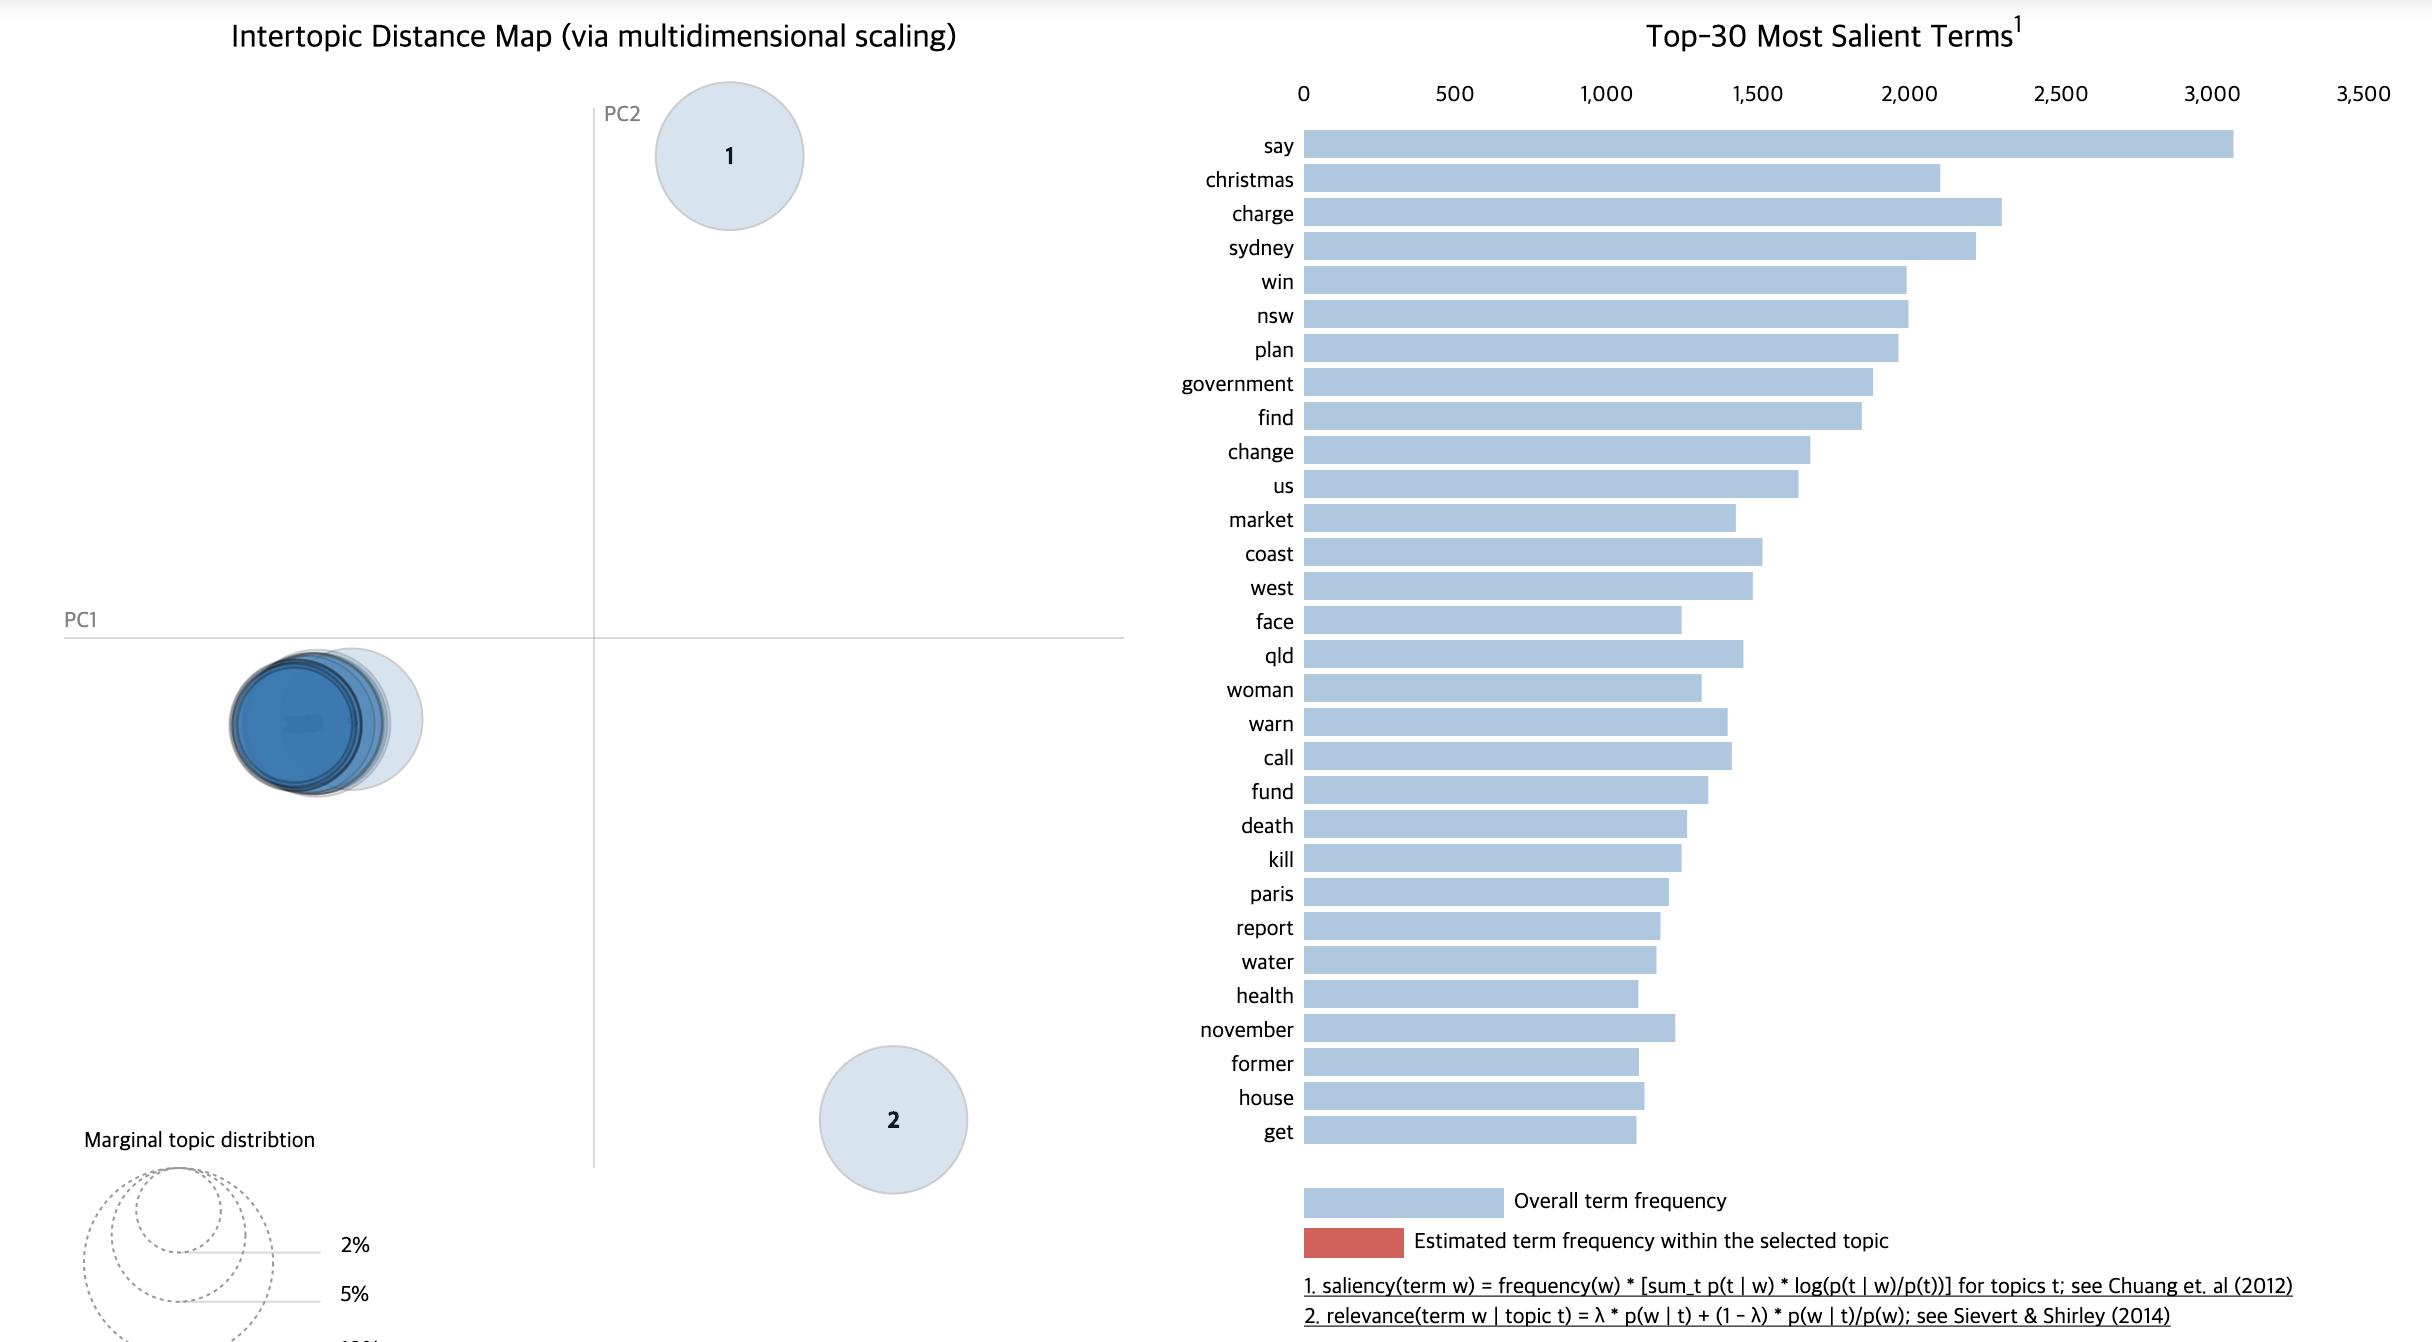

In [161]:
# Visualize the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#vis

from PIL import Image
 
# 이미지 열기
im = Image.open('/Users/moon-il/Desktop/스크린샷 2019-06-08 오전 6.32.29.png')
im

In [120]:
# 최적의 토픽을 찾기 위해 discution하였다.
# sol1 : 불용어처리(위에서 함)
# sol2 : 파라미터 의미를 이해하여 직접 하이퍼파라미터 조정(위에서 함)
# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# passes 와 coherences

coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics = 20
    if i==0:
        p=1
    else:
        p=i*5
    #tic = time.time()

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherences.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexities.append(lda_model.log_perplexity(corpus))
    


Cpherence 0.5144234828022067
Perplexity:  -18.45373364924483 


Cpherence 0.5138473404483578
Perplexity:  -18.30418317288174 


Cpherence 0.5133047522199219
Perplexity:  -18.153743798993787 


Cpherence 0.5133047522199219
Perplexity:  -18.04307224555657 


Cpherence 0.5111071780427239
Perplexity:  -17.976905161607068 


Cpherence 0.5110427959414772
Perplexity:  -17.935358295715808 


Cpherence 0.5110427959414772
Perplexity:  -17.907432819260205 


Cpherence 0.5110821765514098
Perplexity:  -17.88756328336602 


Cpherence 0.5113365235847264
Perplexity:  -17.872786118688687 


Cpherence 0.5113365235847264
Perplexity:  -17.86140892573637 




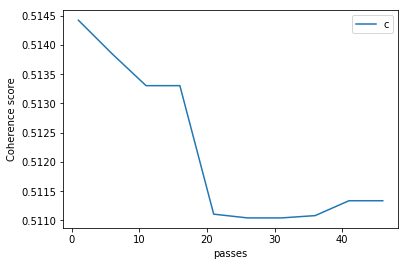

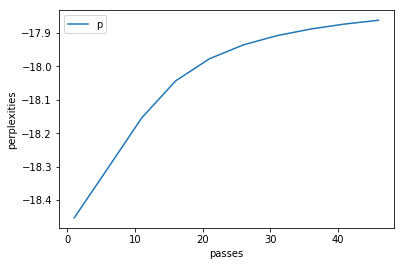

In [130]:
# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("passes")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [131]:
# 최적의 passes는? -> p = 10
p = 10


# 최적의 토픽의 갯수는??


coherencesT=[]
perplexitiesT=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 10*i
    nwords = 100
    #tic = time.time()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('ntopics',ntopics,time.time() - tic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherencesT.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda_model.log_perplexity(corpus))
    


Cpherence 0.46169449276731567
Perplexity:  -8.947435014002668 


Cpherence 0.4264358105679471
Perplexity:  -9.95963264977801 


Cpherence 0.5133047522199219
Perplexity:  -18.153743798993787 


Cpherence 0.5575155038074562
Perplexity:  -22.99809873978731 


Cpherence 0.5737350055547534
Perplexity:  -28.15957520470448 


Cpherence 0.5764596099959526
Perplexity:  -34.60333325270728 


Cpherence 0.5431701281453409
Perplexity:  -44.068327163557115 


Cpherence 0.5047357246671401
Perplexity:  -56.91103795327415 


Cpherence 0.49380232612726244
Perplexity:  -76.56296251966164 


Cpherence 0.5204028876067552
Perplexity:  -93.82995975945333 




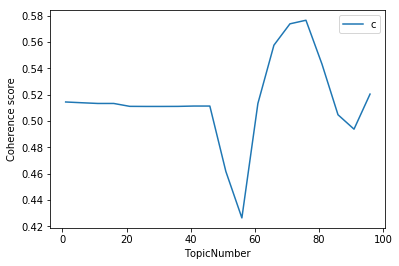

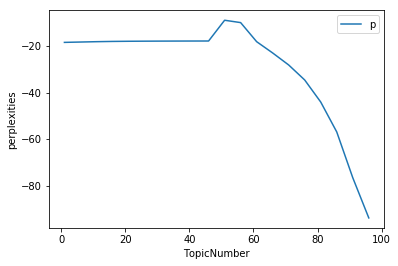

In [148]:
# Show graph
limit=100; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("TopicNumber")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=100; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("TopicNumber")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [152]:
#  최적의 토픽의 수는 50으로 결정!!


# 최적의 모델은?
p = 10
ntopics = 50
    
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)

In [153]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -34.60333325270728

Coherence Score:  0.5764596099959526


In [154]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(35,
  '0.230*"coast" + 0.189*"big" + 0.107*"bash" + 0.096*"follow" + 0.040*"chase" '
  '+ 0.036*"blow" + 0.030*"bat" + 0.016*"guard" + 0.009*"impress" + '
  '0.007*"grapes"'),
 (14,
  '0.154*"png" + 0.140*"gold" + 0.104*"coast" + 0.066*"abc" + 0.060*"defence" '
  '+ 0.045*"likely" + 0.044*"bridge" + 0.042*"suspend" + 0.031*"authorities" + '
  '0.023*"crew"'),
 (4,
  '0.102*"protest" + 0.099*"officer" + 0.095*"hit" + 0.087*"tax" + '
  '0.073*"announce" + 0.061*"confirm" + 0.041*"promise" + 0.036*"sink" + '
  '0.032*"overturn" + 0.022*"cancel"'),
 (40,
  '0.086*"fear" + 0.050*"protect" + 0.047*"behind" + 0.044*"home" + '
  '0.043*"bushfires" + 0.042*"holiday" + 0.041*"politics" + 0.038*"iron" + '
  '0.035*"smith" + 0.033*"know"'),
 (47,
  '0.115*"leave" + 0.096*"open" + 0.078*"tree" + 0.071*"game" + '
  '0.048*"destroy" + 0.045*"bay" + 0.031*"cat" + 0.030*"israel" + '
  '0.024*"fraser" + 0.023*"sit"'),
 (39,
  '0.114*"children" + 0.074*"study" + 0.063*"jet" + 0.063*"help" + '
  '0.058*

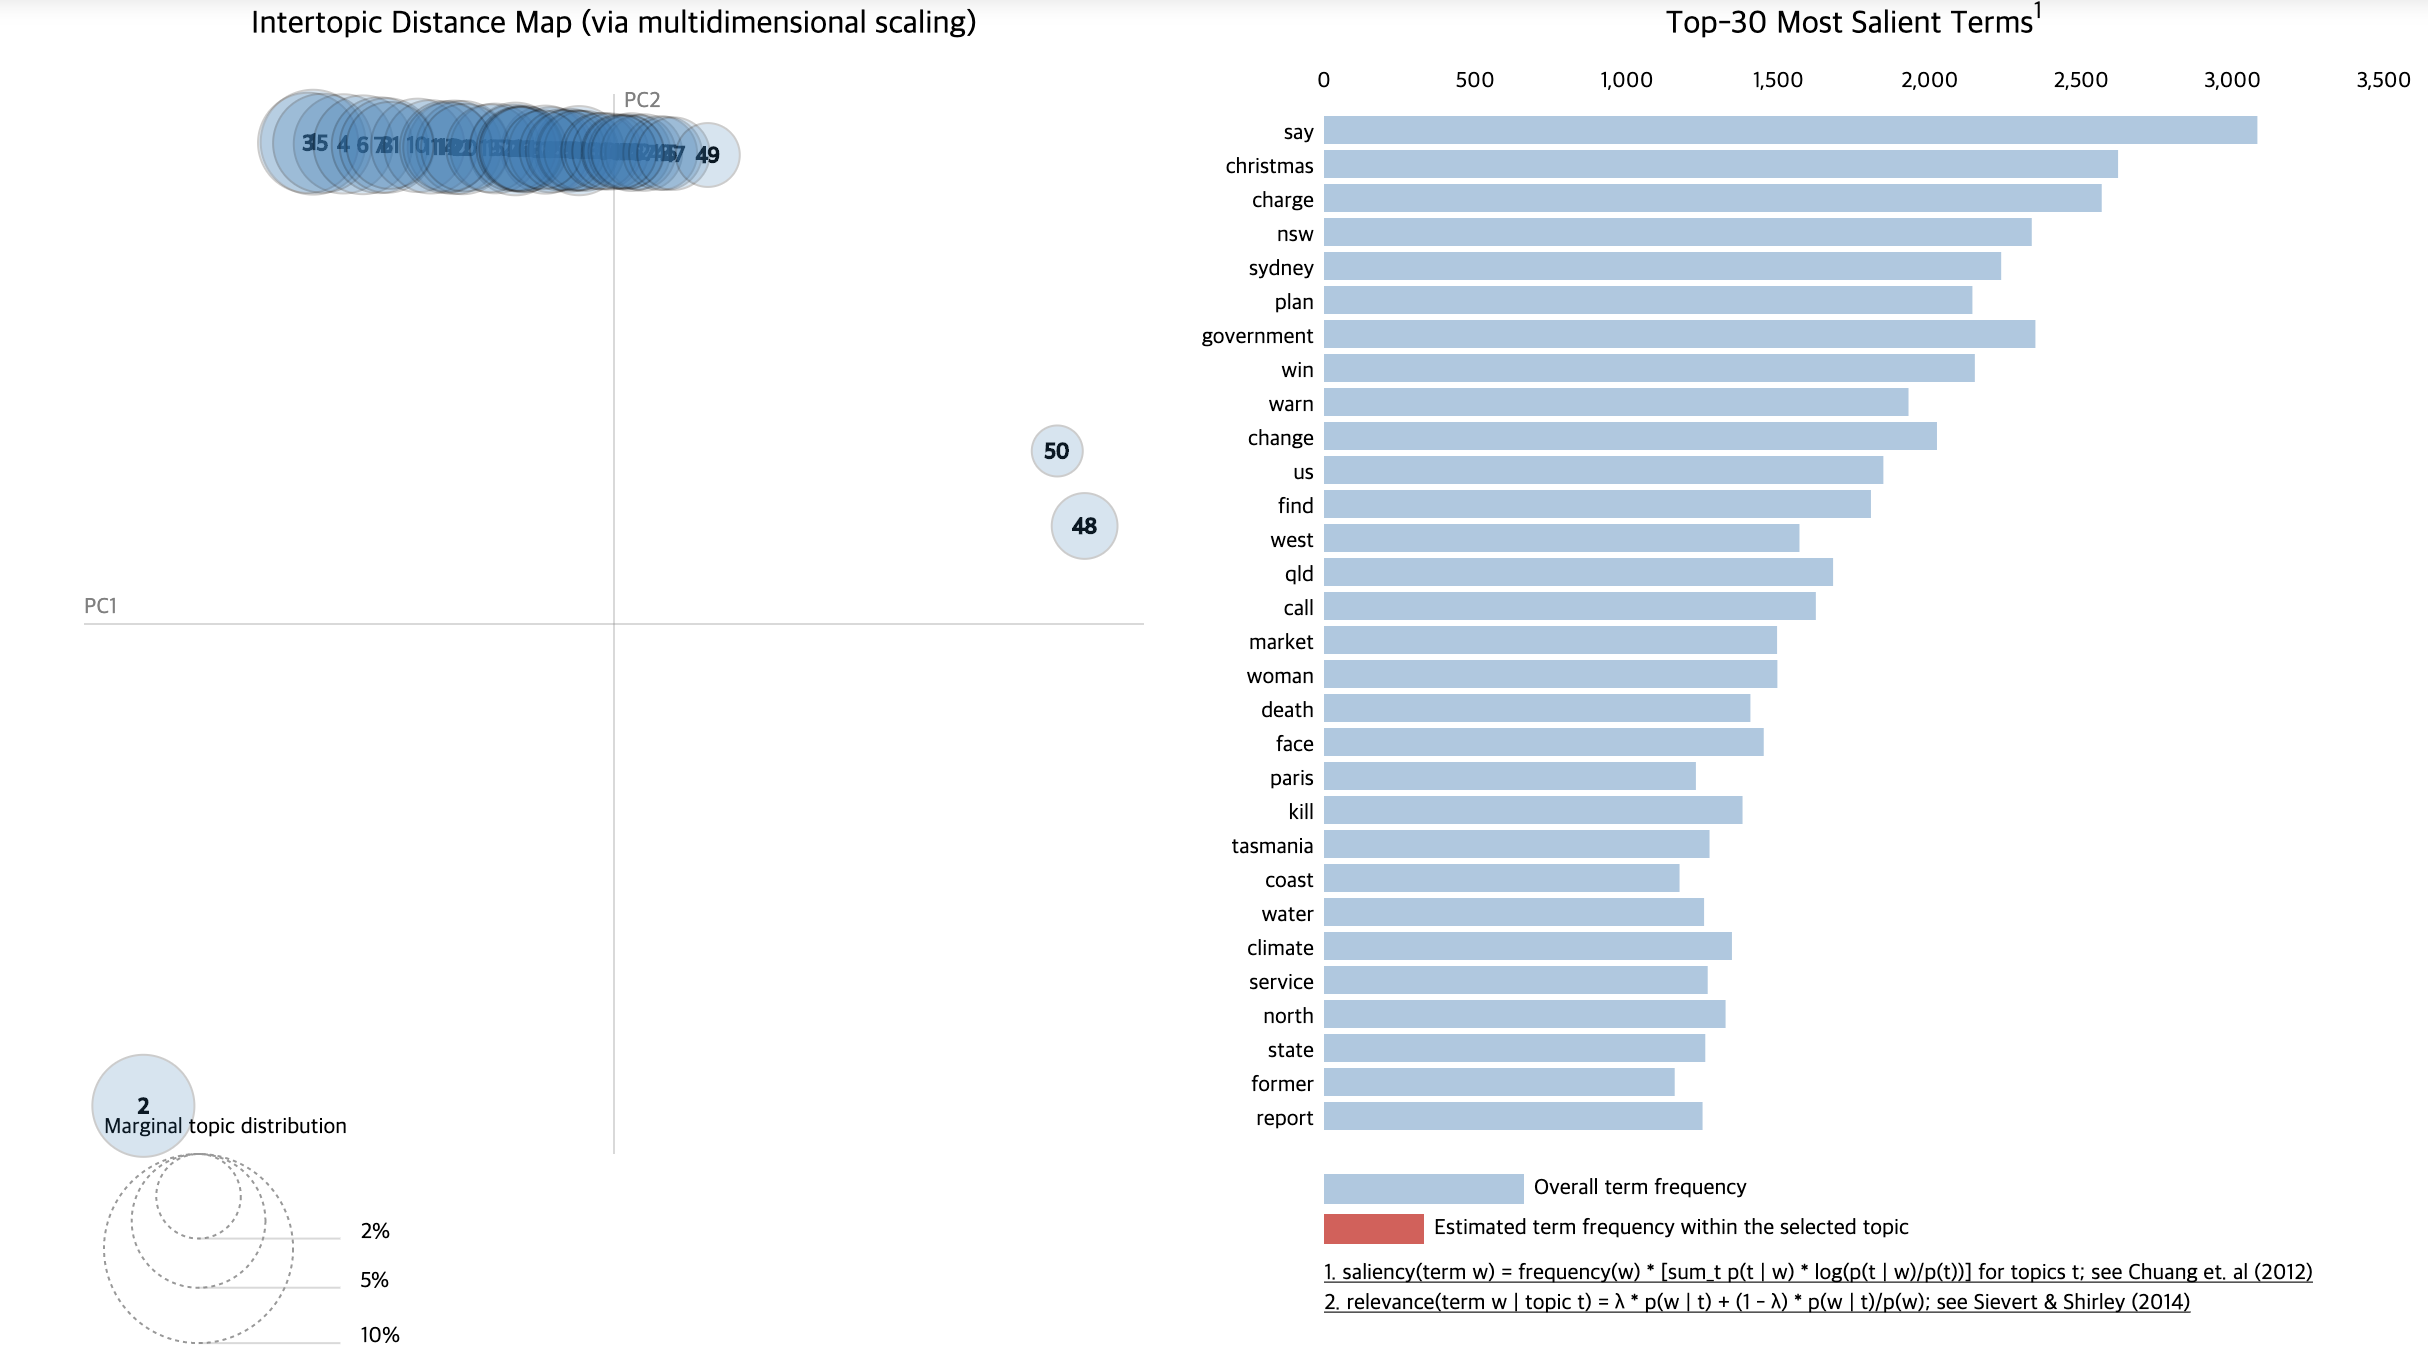

In [162]:
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#vis
# 이미지 열기
im = Image.open('/Users/moon-il/Desktop/스크린샷 2019-06-08 오전 6.32.51.png')
im